In [229]:
import pandas as pd
import json

In [230]:
df1 = pd.read_csv('data/ml4h_accepted_authors.csv')

In [231]:
df1.head()

,paperNum,Name,Email,Country,Affiliation
0,3,Albert Haque,ahaque@cs.stanford.edu,United States,Stanford University
1,3,Corinna Fukushima,corinna_m_fukushima@rush.edu,United States,Rush University Medical Center
2,4,Luke O'Connor,loconnor@g.harvard.edu,United States,Harvard Chan School of Public Health
3,4,Alkes Price,aprice@hsph.harvard.edu,United States,Harvard Chan School of Public Health
4,5,Xu Chen,Xu.Chen@sas.com,United States,SAS Inc


In [232]:
df2 = pd.read_csv('data/ml4h_accepted_papers_reformat.csv')
df2.head()

,paperNum,Name,Title,Decision
0,3,Albert Haque and Corinna Fukushima,Automatic Documentation of ICD Codes with Far-...,poster
1,4,Luke O'Connor and Alkes Price,Distinguishing correlation from causation usin...,poster
2,5,Xu Chen and Saratendu Sethi,Robust Active Learning for Electrocardiographi...,digital
3,7,Viraj Uday Prabhu and Anitha Kannan,Prototypical Clustering Networks for Dermatolo...,poster
4,9,"Albert Haque, Michelle Guo, Adam Miner and Li ...",Measuring the Severity of Depressive Symptoms ...,poster


In [233]:
df3 = df1.merge(df2, on='paperNum')

In [234]:
df3 = df3[df3['Decision'] == 'poster']

In [235]:
print len(df3), 'authors'
print len(df3['Name_x'].unique()), 'unique authors'

348 authors
322 unique authors


In [236]:
print 'top authors by count'
print df3['Name_x'].value_counts().head(10)

top authors by count
John Guttag               4
Albert Haque              3
Mihaela van der Schaar    3
Li Fei-Fei                3
Marzyeh Ghassemi          3
Adrian Dalca              3
Matthias Hüser            2
Sendhil Mullainathan      2
Jure Leskovec             2
Andrew Miller             2
Name: Name_x, dtype: int64


In [237]:
# source: https://stackoverflow.com/questions/2460177/edit-distance-in-python

def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]


In [238]:
levenshteinDistance('cb','abc')

2

# Neurips comparison

In [239]:
df = pd.read_csv('data/neurips.csv')

In [240]:
df['paper_authors'].head()

0                                                   []
1    [{'author_name': 'Francis Bach', 'author_link'...
2    [{'author_name': 'Jianlong Chang', 'author_lin...
3    [{'author_name': 'Guangrun Wang', 'author_link...
4    [{'author_name': 'Constantinos Daskalakis', 'a...
Name: paper_authors, dtype: object

In [241]:
dict()

{}

In [242]:
x = df['paper_authors'].iloc[1]

In [243]:
import ast
df['paper_authors_lst'] = df['paper_authors'].apply(lambda x: ast.literal_eval(x))

In [244]:
df.head()

,abstract_txt,event_type,paper_authors,paper_link,paper_title,pdf_link,supplemental_link,paper_authors_lst
0,NaN,NaN,[],/,Books,NaN,NaN,[]
1,We consider the minimization of submodular fun...,Poster,"[{'author_name': 'Francis Bach', 'author_link'...",/paper/7286-efficient-algorithms-for-non-conve...,Efficient Algorithms for Non-convex Isotonic R...,/paper/7286-efficient-algorithms-for-non-conve...,/paper/7286-efficient-algorithms-for-non-conve...,"[{u'author_name': u'Francis Bach', u'author_li..."
2,Convolutional neural networks (CNNs) are inher...,Poster,"[{'author_name': 'Jianlong Chang', 'author_lin...",/paper/7287-structure-aware-convolutional-neur...,Structure-Aware Convolutional Neural Networks,/paper/7287-structure-aware-convolutional-neur...,/paper/7287-structure-aware-convolutional-neur...,"[{u'author_name': u'Jianlong Chang', u'author_..."
3,"As an indispensable component, Batch Normaliza...",Poster,"[{'author_name': 'Guangrun Wang', 'author_link...",/paper/7288-kalman-normalization-normalizing-i...,Kalman Normalization: Normalizing Internal Rep...,/paper/7288-kalman-normalization-normalizing-i...,/paper/7288-kalman-normalization-normalizing-i...,"[{u'author_name': u'Guangrun Wang', u'author_l..."
4,Asynchronous Gibbs sampling has been recently ...,Poster,"[{'author_name': 'Constantinos Daskalakis', 'a...",/paper/7289-hogwild-gibbs-can-be-panaccurate,HOGWILD!-Gibbs can be PanAccurate,/paper/7289-hogwild-gibbs-can-be-panaccurate.pdf,/paper/7289-hogwild-gibbs-can-be-panaccurate-s...,"[{u'author_name': u'Constantinos Daskalakis', ..."


In [245]:
author_names = list()
author_links = list()
paper_links = list()

for index, row in df.iterrows():
    paper_authors = row['paper_authors_lst']
    paper_link = row['paper_link']
    if len(paper_authors) > 0:
        for auth in paper_authors:
            author_names.append(auth['author_name'])
            author_links.append(auth['author_link'])
            paper_links.append(paper_link)
            
neurips_df = pd.DataFrame({'name': author_names, 'author_link': author_links, 'paper':paper_links})

In [246]:
neurips_df.head()

,author_link,name,paper
0,/author/francis-bach-6335,Francis Bach,/paper/7286-efficient-algorithms-for-non-conve...
1,/author/jianlong-chang-10489,Jianlong Chang,/paper/7287-structure-aware-convolutional-neur...
2,/author/jie-gu-10490,Jie Gu,/paper/7287-structure-aware-convolutional-neur...
3,/author/lingfeng-wang-10491,Lingfeng Wang,/paper/7287-structure-aware-convolutional-neur...
4,/author/gaofeng-meng-10492,GAOFENG MENG,/paper/7287-structure-aware-convolutional-neur...


In [247]:
neurips_df['name'].value_counts().head(10)

Josh Tenenbaum       10
Eric P. Xing          8
Michael I. Jordan     8
Sergey Levine         8
Francis Bach          7
Tong Zhang            7
Masashi Sugiyama      6
Mingyuan Zhou         6
Honglak Lee           6
Stefano Ermon         6
Name: name, dtype: int64

In [248]:
print len(neurips_df['name']), 'authors'
print len(neurips_df['name'].unique()), 'unique authors'

3824 authors
3127 unique authors


# Overlap btw ML4H and NeurIPS

In [249]:
'test'.lower()

'test'

In [250]:
# def intersection(lst1, lst2): 
#     lst3 = [value for value in lst1 if value in lst2] 
#     return lst3 

def intersection(lst1, lst2): 
    lst1 = [i.lower() for i in lst1]
    lst2 = [i.lower() for i in lst2]
    return list(set(lst1) & set(lst2)) 


In [251]:
ml4hneurips_intersect = intersection(neurips_df['name'].values, df3['Name_x'].values)

In [252]:
print len(neurips_df['name'].unique())
print len(df3['Name_x'].unique())
print len(ml4hneurips_intersect)

3127
322
20


## Exploratory questions


How many authors for ML4H? Average number of authors? Average number of institutions on one paper?

How many authors for NeurIPS? Average number of authors? Average number of institutions on one paper?

How many authors have papers in both? For those authors, did the average number of collaborators change for venue?

In [253]:
df3.head()

,paperNum,Name_x,Email,Country,Affiliation,Name_y,Title,Decision
0,3,Albert Haque,ahaque@cs.stanford.edu,United States,Stanford University,Albert Haque and Corinna Fukushima,Automatic Documentation of ICD Codes with Far-...,poster
1,3,Corinna Fukushima,corinna_m_fukushima@rush.edu,United States,Rush University Medical Center,Albert Haque and Corinna Fukushima,Automatic Documentation of ICD Codes with Far-...,poster
2,4,Luke O'Connor,loconnor@g.harvard.edu,United States,Harvard Chan School of Public Health,Luke O'Connor and Alkes Price,Distinguishing correlation from causation usin...,poster
3,4,Alkes Price,aprice@hsph.harvard.edu,United States,Harvard Chan School of Public Health,Luke O'Connor and Alkes Price,Distinguishing correlation from causation usin...,poster
6,7,Viraj Uday Prabhu,virajp@gatech.edu,United States,Georgia Institute of Technology,Viraj Uday Prabhu and Anitha Kannan,Prototypical Clustering Networks for Dermatolo...,poster


In [254]:
print len([i.lower() for i in df3['Name_x'].unique()]), 'authors in ML4H'
print '%.2f authors per paper' % df3.groupby('paperNum').count()['Name_x'].mean()
print '%.2f affiliations per paper' % df3.groupby(['paperNum', 'Affiliation']).count()['Name_x'].mean()

322 authors in ML4H
4.35 authors per paper
2.26 affiliations per paper


In [255]:
print len([i.lower() for i in neurips_df['name'].unique()]), 'authors in Neurips'
print '%.2f authors per paper' % neurips_df.groupby('paper').count()['name'].mean()
# print '%.2f affiliations per paper' % df3.groupby(['paperNum', 'Affiliation']).count()['Name_x'].mean()

3127 authors in Neurips
3.79 authors per paper


In [256]:
%matplotlib inline

from matplotlib import pyplot as plt


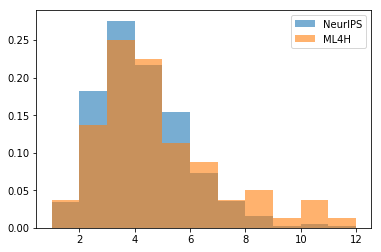

In [257]:
plt.hist(neurips_df.groupby('paper').count()['name'],label='NeurIPS', density=True, alpha=0.6, bins=range(1,13))
plt.hist(df3.groupby('paperNum').count()['Name_x'], label='ML4H', density=True, alpha=0.6, bins=range(1,13))
plt.legend()
plt.show()

In [258]:
from scipy.stats import ttest_ind

In [259]:
print ttest_ind(df3.groupby('paperNum').count()['Name_x'], neurips_df.groupby('paper').count()['name'])

Ttest_indResult(statistic=2.8099868577146685, pvalue=0.005043316126030703)


In [260]:
ml4hneurips_intersect = intersection(neurips_df['name'].values, df3['Name_x'].values)

In [261]:
# for each person in ml4hneurips_intersect,
# get papers in both ml4h and neurips with these authors
# get average number of authors on ml4h papers and average number of authors on neurips papers
# get average diff 

In [262]:
int_set = set(ml4hneurips_intersect)

In [263]:
print len(int_set)

20


In [264]:
ml4h_int = df3[df3['Name_x'].apply(lambda x: x.lower() in int_set)]
neurips_int = neurips_df[neurips_df['name'].apply(lambda x: x.lower() in int_set)]



In [265]:
neurips_avg_authors = neurips_df.groupby('paper').count()[['name']]
neurips_avg_authors = neurips_avg_authors.reset_index()
int_papers_author_ct = neurips_int.merge(neurips_avg_authors, on='paper')
int_papers_author_ct_avg = int_papers_author_ct.groupby('name_x').mean()['name_y']

In [266]:
ml4h_avg_authors = df3.groupby('paperNum').count()[['Name_x']]
ml4h_avg_authors = ml4h_avg_authors.reset_index()
ml4h_int_papers_author_ct = ml4h_int.merge(ml4h_avg_authors, on='paperNum')
ml4h_int_papers_author_ct_avg = ml4h_int_papers_author_ct.groupby('Name_x_x').mean()['Name_x_y']

In [267]:
combo = pd.DataFrame({'ml4h': ml4h_int_papers_author_ct_avg, 'neurips':int_papers_author_ct_avg})

In [268]:
ml4h_int_papers_author_ct_avg.index

Index([u'Adrian Dalca', u'Aniruddh Raghu', u'Bingbin Liu', u'Bo Liu',
       u'Caroline Uhler', u'Dimitris Bertsimas', u'Eran Segal',
       u'Francesco Locatello', u'Francesco Paolo Casale', u'François Portier',
       u'Jennifer Listgarten', u'Jon Kleinberg', u'Jure Leskovec',
       u'Maithra Raghu', u'Matthieu Komorowski', u'Mert Sabuncu',
       u'Mihaela van der Schaar', u'Nicolo Fusi', u'Thomas B. Schön',
       u'Wei-Hung Weng'],
      dtype='object', name=u'Name_x_x')

In [269]:
combo['diff'] = combo['ml4h'] - combo['neurips']

0.508333333333


(array([2., 0., 4., 4., 7., 1., 0., 1., 0., 1.]),
 array([-4. , -2.8, -1.6, -0.4,  0.8,  2. ,  3.2,  4.4,  5.6,  6.8,  8. ]),
 <a list of 10 Patch objects>)

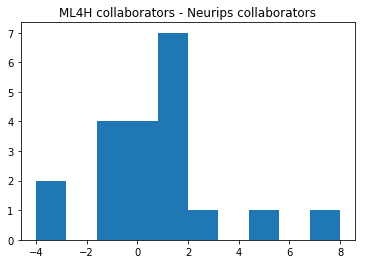

In [270]:
print combo['diff'].mean()
plt.title('ML4H collaborators - Neurips collaborators')
plt.hist(combo['diff'])

In [271]:
print ttest_ind(combo['ml4h'], combo['neurips'])

Ttest_indResult(statistic=0.8112712450003217, pvalue=0.42226245744700663)


# Are there "all-stars" in fields?

In [272]:
print neurips_df.groupby('name').count()['paper'].mean()
print df3.groupby('Name_x').count()['paperNum'].mean()

1.2228973457
1.08074534161


In [273]:
print ttest_ind(neurips_df.groupby('name').count()['paper'], df3.groupby('Name_x').count()['paperNum'])

Ttest_indResult(statistic=3.7794960146515133, pvalue=0.00015980531238968997)


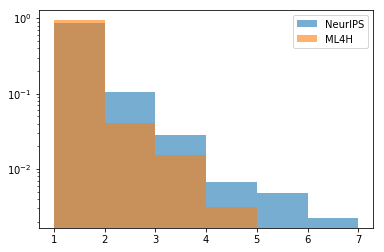

In [274]:
plt.hist(neurips_df.groupby('name').count()['paper'],label='NeurIPS', density=True, alpha=0.6, bins=range(1,8))
plt.hist(df3.groupby('Name_x').count()['paperNum'], label='ML4H', density=True, alpha=0.6, bins=range(1,8))
plt.legend()
plt.semilogy()
plt.show()

# Organizations?

In [275]:
print df3['Country'].value_counts()
print len(df3['Country'].value_counts())

United States     210
Canada             35
United Kingdom     24
Switzerland        12
Taiwan             11
Singapore           9
Brazil              9
Japan               7
France              7
Germany             5
Israel              4
Belgium             4
Italy               4
Finland             2
South Korea         2
Australia           1
China               1
Sweden              1
Name: Country, dtype: int64
18


In [276]:
df3.head()

,paperNum,Name_x,Email,Country,Affiliation,Name_y,Title,Decision
0,3,Albert Haque,ahaque@cs.stanford.edu,United States,Stanford University,Albert Haque and Corinna Fukushima,Automatic Documentation of ICD Codes with Far-...,poster
1,3,Corinna Fukushima,corinna_m_fukushima@rush.edu,United States,Rush University Medical Center,Albert Haque and Corinna Fukushima,Automatic Documentation of ICD Codes with Far-...,poster
2,4,Luke O'Connor,loconnor@g.harvard.edu,United States,Harvard Chan School of Public Health,Luke O'Connor and Alkes Price,Distinguishing correlation from causation usin...,poster
3,4,Alkes Price,aprice@hsph.harvard.edu,United States,Harvard Chan School of Public Health,Luke O'Connor and Alkes Price,Distinguishing correlation from causation usin...,poster
6,7,Viraj Uday Prabhu,virajp@gatech.edu,United States,Georgia Institute of Technology,Viraj Uday Prabhu and Anitha Kannan,Prototypical Clustering Networks for Dermatolo...,poster


In [277]:
print df3['Affiliation'].value_counts()
print len(df3['Affiliation'].value_counts())

Stanford University                                                                                                      27
MIT                                                                                                                      15
Massachusetts Institute of Technology                                                                                    14
Stony Brook University                                                                                                   12
University of Toronto                                                                                                    11
Stanford                                                                                                                 11
UFMG                                                                                                                      9
Cambridge Cancer Genomics                                                                                                 7
Sage Bio